In [9]:
import tensorflow
tensorflow.__version__

'2.3.1'

In [10]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [11]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [128,128]

train_path = 'output/train'
test_path = 'output/val'

In [12]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(128,128),
                                              batch_size=512,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(128,128),
                                            batch_size=512,
                                            class_mode='categorical')

Found 18568 images belonging to 15 classes.
Found 2070 images belonging to 15 classes.


# **For InceptionV3**

In [14]:
# create the base pre-trained model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x2 = base_model.output
x2 = GlobalAveragePooling2D()(x2)

In [15]:
predictions = Dense(15, activation='softmax')(x2)

# this is the model we will train
models = Model(inputs=base_model.input, outputs=predictions)
models.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [16]:
for layer in base_model.layers:
    layer.trainable = False


In [22]:
models.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = models.fit_generator(train_set, validation_data=test_set, epochs=15, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[callback])

Epoch 1/15
37/37 [==============================] - 486s 13s/step - loss: 0.7043 - accuracy: 0.7710 - val_loss: 0.7176 - val_accuracy: 0.7575
Epoch 2/15
37/37 [==============================] - 360s 10s/step - loss: 0.6508 - accuracy: 0.7853 - val_loss: 0.6484 - val_accuracy: 0.7831
Epoch 3/15
37/37 [==============================] - 359s 10s/step - loss: 0.6149 - accuracy: 0.7974 - val_loss: 0.6318 - val_accuracy: 0.7845
Epoch 4/15
37/37 [==============================] - 359s 10s/step - loss: 0.5986 - accuracy: 0.8006 - val_loss: 0.6275 - val_accuracy: 0.7860
Epoch 5/15
37/37 [==============================] - 360s 10s/step - loss: 0.5696 - accuracy: 0.8077 - val_loss: 0.6318 - val_accuracy: 0.7841
Epoch 6/15
37/37 [==============================] - 359s 10s/step - loss: 0.5595 - accuracy: 0.8155 - val_loss: 0.6058 - val_accuracy: 0.7937
Epoch 7/15
37/37 [==============================] - 363s 10s/step - loss: 0.5442 - accuracy: 0.8169 - val_loss: 0.6062 - val_accuracy: 0.8010
Epoch 

In [39]:
models.save('inception.h5')

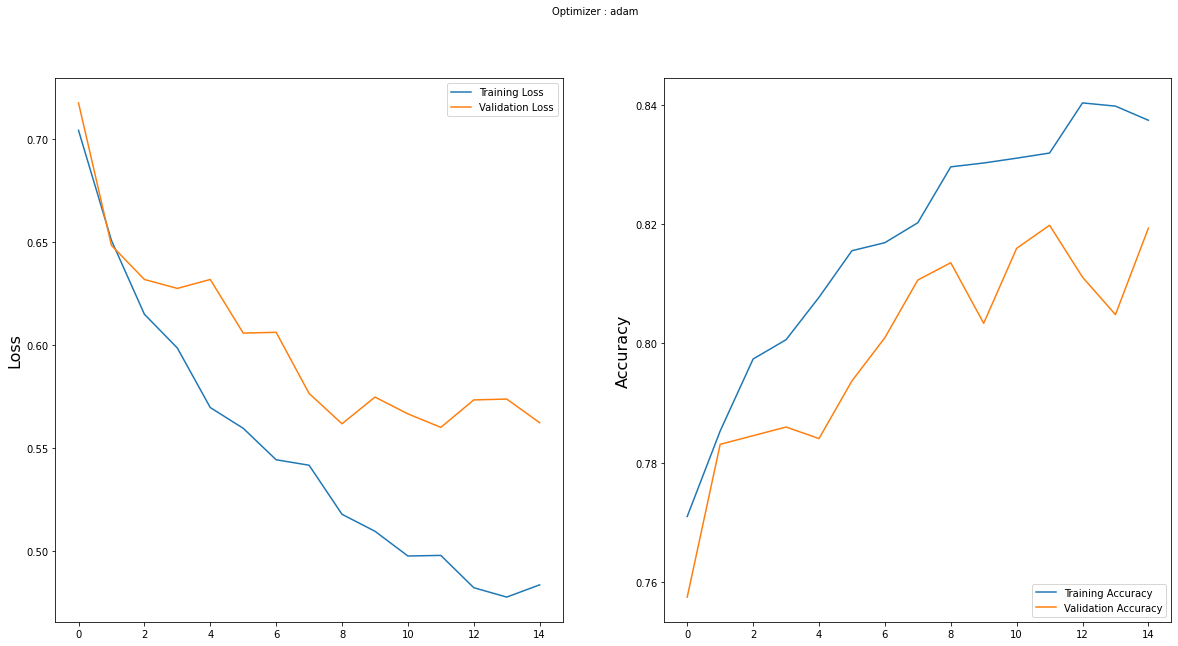

In [23]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **VGG19**

In [50]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
vgg19=VGG19(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [51]:
x11= Flatten()(vgg19.output)
prediction11 = Dense(15, activation='softmax')(x11)
model11 = Model(inputs = vgg19.inputs, outputs = prediction11)
model11.summary()
model11.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)     

In [52]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = model11.fit_generator(train_set, validation_data=test_set, epochs=2, steps_per_epoch=5, validation_steps=5,callbacks=[callback])

Epoch 1/2
5/5 [==============================] - 1208s 242s/step - loss: 4.9626 - accuracy: 0.0865 - val_loss: 2.6756 - val_accuracy: 0.1551
Epoch 2/2
5/5 [==============================] - 988s 198s/step - loss: 2.6338 - accuracy: 0.1593 - val_loss: 2.5574 - val_accuracy: 0.1551


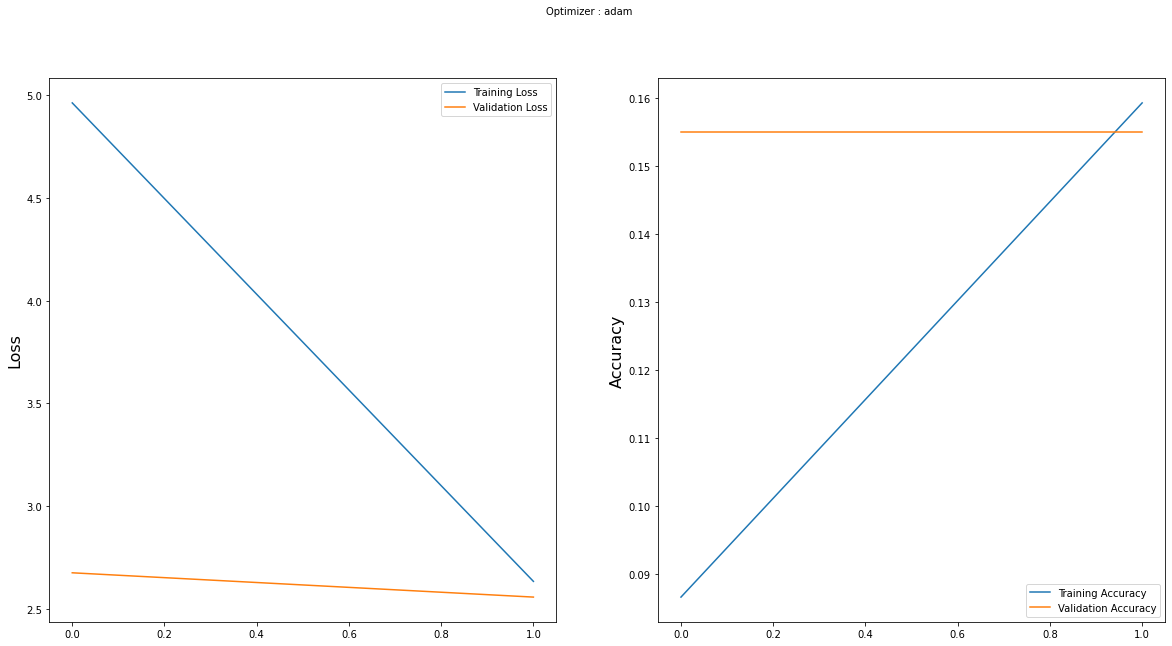

In [53]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


# **INCEPTION RESNET V2**

In [24]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

219062272/219055592 [==============================] - 29s 0us/step


In [25]:
x3 = Flatten()(inc.output)
predictionss = Dense(15, activation='softmax')(x3)

In [26]:
modelss = Model(inputs = inc.inputs, outputs = predictionss)
modelss.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 63, 63, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 63, 63, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 63, 63, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

batch_normalization_279 (BatchN (None, 2, 2, 224)    672         conv2d_279[0][0]                 
__________________________________________________________________________________________________
activation_279 (Activation)     (None, 2, 2, 224)    0           batch_normalization_279[0][0]    
__________________________________________________________________________________________________
conv2d_277 (Conv2D)             (None, 2, 2, 192)    399360      block8_5_ac[0][0]                
__________________________________________________________________________________________________
conv2d_280 (Conv2D)             (None, 2, 2, 256)    172032      activation_279[0][0]             
__________________________________________________________________________________________________
batch_normalization_277 (BatchN (None, 2, 2, 192)    576         conv2d_277[0][0]                 
__________________________________________________________________________________________________
batch_norm

In [29]:
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss.fit_generator(train_set, validation_data=train_set, epochs=2, steps_per_epoch=len(train_set), validation_steps=len(train_set))
x=r2

Epoch 1/2
37/37 [==============================] - 3594s 97s/step - loss: 0.2210 - accuracy: 0.9498 - val_loss: 358.3690 - val_accuracy: 0.0478
Epoch 2/2
37/37 [==============================] - 3580s 97s/step - loss: 0.0597 - accuracy: 0.9856 - val_loss: 46.2751 - val_accuracy: 0.1599


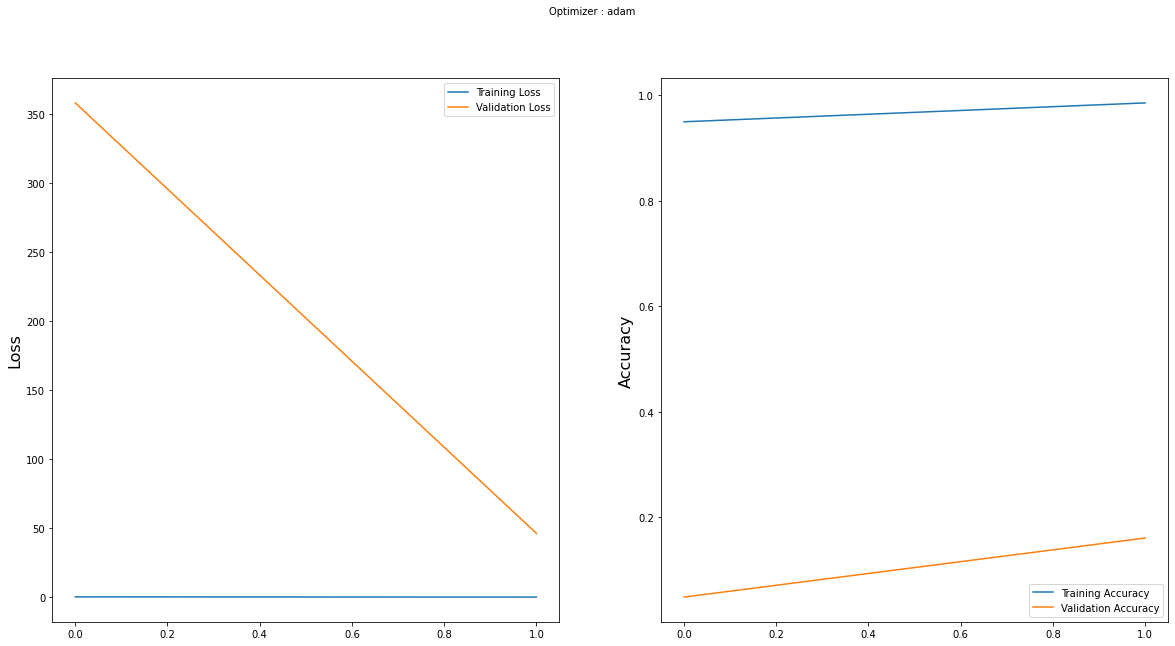

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **MobileNet**

In [54]:
from tensorflow.keras.applications import MobileNet, MobileNetV2
mob = MobileNet(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [55]:
x1= Flatten()(mob.output)
prediction1 = Dense(15, activation='softmax')(x1)
model12 = Model(inputs = mob.inputs, outputs = prediction1)
model12.summary()
model12.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)      

In [56]:
r1 = model12.fit_generator(train_set, validation_data=test_set, epochs=10, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/10
37/37 [==============================] - 1333s 36s/step - loss: 1.2875 - accuracy: 0.8021 - val_loss: 16.2284 - val_accuracy: 0.2594
Epoch 2/10
37/37 [==============================] - 1305s 35s/step - loss: 0.0804 - accuracy: 0.9736 - val_loss: 5.4859 - val_accuracy: 0.4928
Epoch 3/10
37/37 [==============================] - 1272s 34s/step - loss: 0.0292 - accuracy: 0.9899 - val_loss: 1.4023 - val_accuracy: 0.7725
Epoch 4/10
37/37 [==============================] - 1283s 35s/step - loss: 0.0277 - accuracy: 0.9916 - val_loss: 2.3966 - val_accuracy: 0.7527
Epoch 5/10
37/37 [==============================] - 1277s 35s/step - loss: 0.0176 - accuracy: 0.9945 - val_loss: 0.9811 - val_accuracy: 0.8348
Epoch 6/10
37/37 [==============================] - 1270s 34s/step - loss: 0.0205 - accuracy: 0.9944 - val_loss: 0.5336 - val_accuracy: 0.8976
Epoch 7/10
37/37 [==============================] - 1276s 34s/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.4226 - val_accuracy: 0.918

In [57]:
model12.save('mobile.h5')

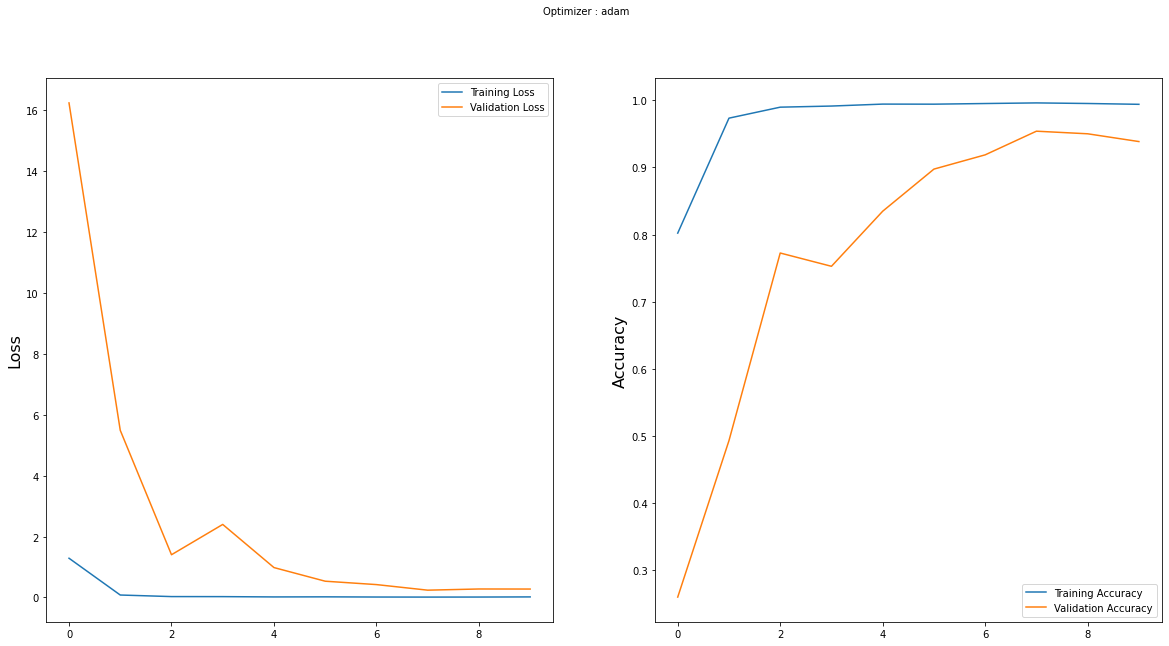

In [58]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **DenseNet121**

In [59]:
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201, ResNet50V2,ResNet101V2,ResNet152V2

In [60]:
des121=DenseNet121(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [61]:
x1= Flatten()(des121.output)
prediction1 = Dense(15, activation='softmax')(x1)
model1 = Model(inputs = des121.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 134, 134, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________

In [62]:
r1 = model1.fit_generator(train_set, validation_data=train_set, epochs=5, steps_per_epoch=len(train_set), validation_steps=len(train_set))

Epoch 1/5
37/37 [==============================] - 6843s 185s/step - loss: 0.7520 - accuracy: 0.8405 - val_loss: 13.7198 - val_accuracy: 0.1780
Epoch 2/5
37/37 [==============================] - 6951s 188s/step - loss: 0.0594 - accuracy: 0.9806 - val_loss: 5.0663 - val_accuracy: 0.3881
Epoch 3/5
37/37 [==============================] - 7053s 191s/step - loss: 0.0455 - accuracy: 0.9851 - val_loss: 10.0378 - val_accuracy: 0.2808
Epoch 4/5
37/37 [==============================] - 7082s 191s/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 5.5359 - val_accuracy: 0.3948
Epoch 5/5
37/37 [==============================] - 6916s 187s/step - loss: 0.0179 - accuracy: 0.9940 - val_loss: 6.4976 - val_accuracy: 0.4402


In [64]:
model1.save('dense.h5')

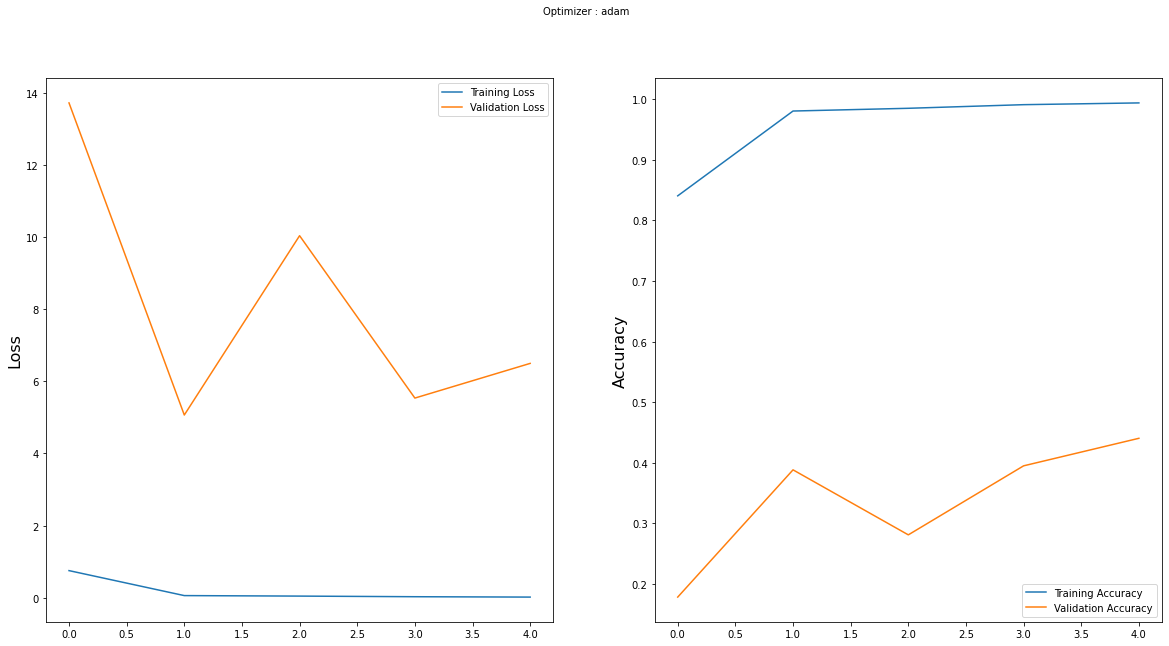

In [63]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **ResNet152V2**

In [46]:
res152V2=ResNet152V2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [47]:
x1= Flatten()(res152V2.output)
prediction1 = Dense(15, activation='softmax')(x1)
model2 = Model(inputs = res152V2.inputs, outputs = prediction1)
model2.summary()
model2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 66, 66, 64)   0           conv1_conv[0][0]                 
______________________________________________________________________________________

conv5_block3_1_conv (Conv2D)    (None, 4, 4, 512)    1048576     conv5_block3_preact_relu[0][0]   
__________________________________________________________________________________________________
conv5_block3_1_bn (BatchNormali (None, 4, 4, 512)    2048        conv5_block3_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block3_1_relu (Activation (None, 4, 4, 512)    0           conv5_block3_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block3_2_pad (ZeroPadding (None, 6, 6, 512)    0           conv5_block3_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_block3_2_conv (Conv2D)    (None, 4, 4, 512)    2359296     conv5_block3_2_pad[0][0]         
__________________________________________________________________________________________________
conv5_bloc

In [48]:
r1 = model2.fit_generator(train_set, validation_data=test_set, epochs=2, steps_per_epoch=5, validation_steps=5)

Epoch 1/2
5/5 [==============================] - 1846s 369s/step - loss: 3.6759 - accuracy: 0.2867 - val_loss: 33.4476 - val_accuracy: 0.2222
Epoch 2/2
5/5 [==============================] - 1475s 295s/step - loss: 1.1856 - accuracy: 0.6434 - val_loss: 14.5572 - val_accuracy: 0.1585


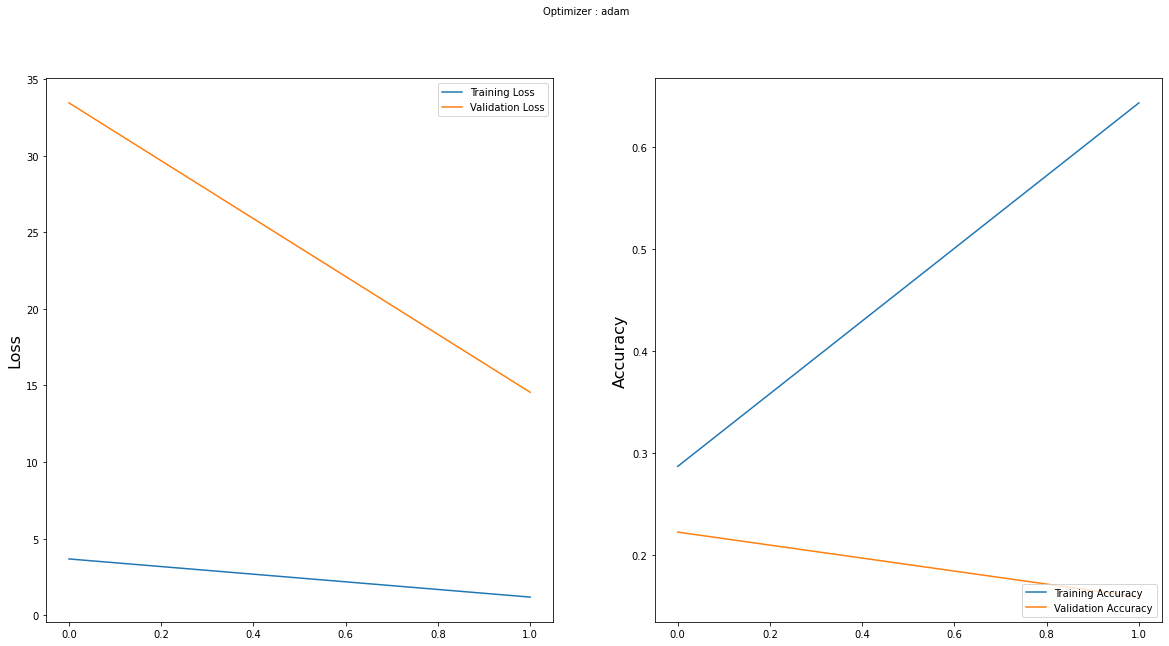

In [49]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import shutil
from glob import glob
import json
import math
import os
import cv2
import glob as gb
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.applications import densenet
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools

Using TensorFlow backend.


In [3]:
code = {"Pepper__bell___Bacterial_spot":0, "Pepper__bell___healthy":1, "Potato___Early_blight":2, 
        "Potato___healthy":3,"Potato___Late_blight":4, "Tomato__Target_Spot":5,"Tomato__Tomato_mosaic_virus":6,
        "Tomato__Tomato_YellowLeaf__Curl_Virus":7, "Tomato_Bacterial_spot":8, "Tomato_Early_blight":9,
        "Tomato_healthy":10,"Tomato_Late_blight":11,"Tomato_Leaf_Mold":12,
        "Tomato_Septoria_leaf_spot":13,"Tomato_Spider_mites_Two_spotted_spider_mite":14,}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [4]:
#NOTE: This cell would only run properly if data is hosted locally

#the directory that contain the train images set
trainpath='output/val/'

X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*'))
    for file in files: 
        image = cv2.imread(file)
        #resize images to 64 x 64 pixels
        image_array = cv2.resize(image , (32,32))
        X_train.append(list(image_array))
        y_train.append(code[folder])
np.save('X_train',X_train)
np.save('y_train',y_train)

In [5]:
#NOTE: This cell would only run properly if data is hosted locally

#the directory that contain the train images set
testpath= 'output/val/'

X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath + folder + '/*'))
    for file in files: 
        image = cv2.imread(file)
        #resize images to 64 x 64 pixels
        image_array = cv2.resize(image , (32,32))
        X_test.append(list(image_array))
        y_test.append(code[folder])
np.save('X_test',X_test)
np.save('y_test',y_test)

In [6]:
loaded_X_train = np.load('X_train.npy')
loaded_X_test = np.load('X_test.npy')
loaded_y_train = np.load('y_train.npy')
loaded_y_test = np.load('y_test.npy')

In [7]:
X_train = loaded_X_train.reshape([-1, np.product((32,32,3))])
X_test = loaded_X_test.reshape([-1, np.product((32,32,3))])

In [8]:
y_train = loaded_y_train
y_test = loaded_y_test

In [9]:
#shuffle train and test data sets in a consistent way

from sklearn.utils import shuffle as shf
X_train, y_train = shf(X_train, y_train, random_state=15)
X_test, y_test = shf(X_test, y_test, random_state=15)

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [11]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train, y_train)
predictions = DT.predict(X_train)
val2 = (accuracy_score(y_train, predictions)*100)
print("*Accuracy score for DT: ", val2, "\n")
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_train, predictions))
print("*Classification Report for DT: ")
print(classification_report(y_train, predictions))

*Accuracy score for DT:  100.0 

*Confusion Matrix for DT: 
[[100   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 148   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 100   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  16   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  38   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 321   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 213   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 100   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 160   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 191   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  96   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 178   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf2 = XGBClassifier()
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('gbdt', clf1), ('xgb', clf2), ('dt', clf3)], voting='hard')

eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_train)
val4 = (accuracy_score(y_train, predictions)*100)
print("*Accuracy score for Voting Classifier: ", val4, "\n")
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_train, predictions))
print("*Classification Report for Voting Classifier: ")
print(classification_report(y_train, predictions))

*Accuracy score for Voting Classifier:  100.0 

*Confusion Matrix for Voting Classifier: 
[[100   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 148   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 100   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  16   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  38   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 321   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 213   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 100   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 160   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 191   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  96   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 178   0]
 [  0   0   0   0   0   0   

In [13]:
import pickle
pickle.dump(DT,open('model.pkl','wb'))

In [14]:
import pickle
pickle.dump(eclf1,open('model_vot.pkl','wb'))